In [1]:
import numpy as np #data handling and preprocessing
import pandas as pd 

#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [2]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#gives number of rows and columns
print(np.shape(df))

(506, 14)


In [4]:
# Let's summarize the data to see the distribution of data
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

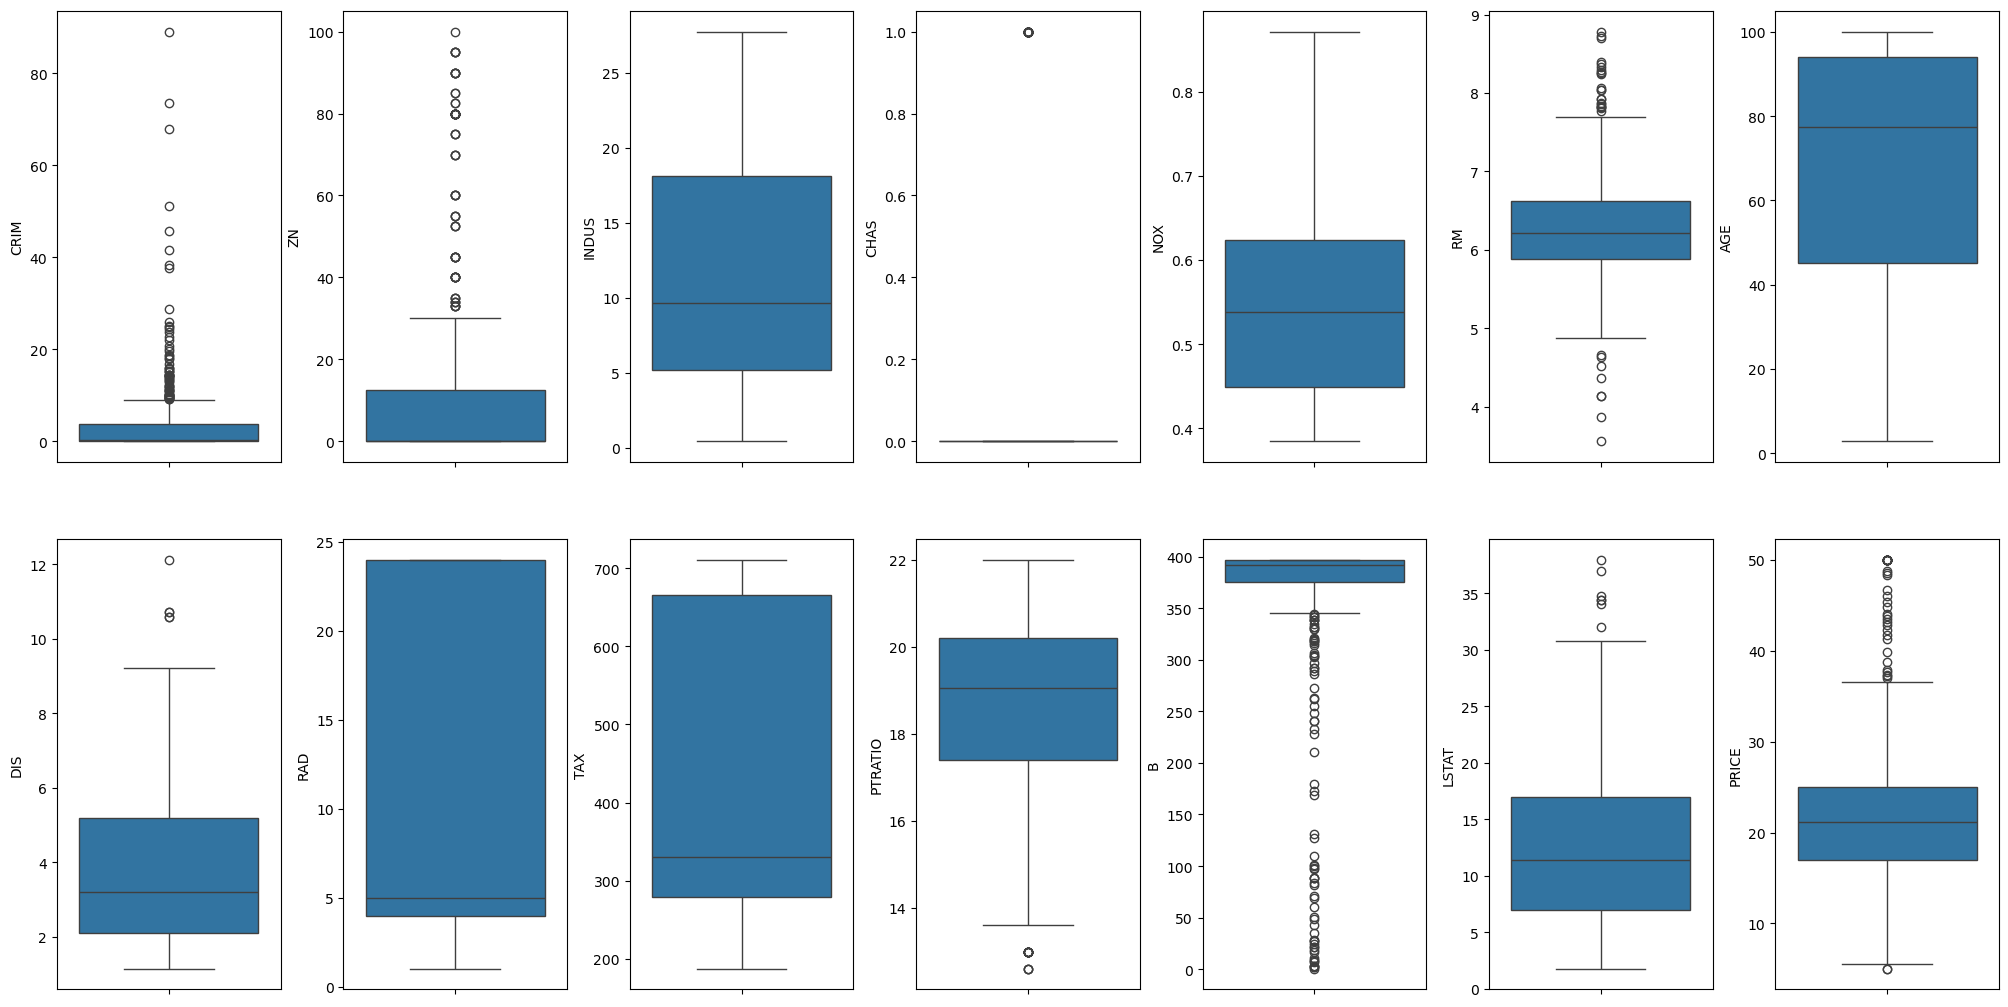

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10)) #14 boxplots n makes the overall figure wide and readable.

index = 0
axs = axs.flatten()  #Makes the 2D axs array into a 1D list so it’s easier to loop through.

for k,v in df.items(): #k is the column name v is the data in that column
    sns.boxplot(y=k, data=df, ax=axs[index]) #draws vertical boxplot for each column
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [7]:
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1  #Interquartile range
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]                                #number of outliers in the column
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]                                      #total number of rows in the DataFrame.
        print("Column %s outliers = %.2f%%" % (k, perc))                                        #percentage of outliers 

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


In [ ]:
df = df[~(df['PRICE'] >= 35.0)]
print(np.shape(df))

In [8]:
#Looking at the data with names and target variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
print(np.shape(df))


(506, 14)


In [11]:
#Checking the null values in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
#Checking the statistics of the data
df.describe()

This is sometimes very useful, for example if you look at the CRIM the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<Axes: xlabel='PRICE', ylabel='Count'>

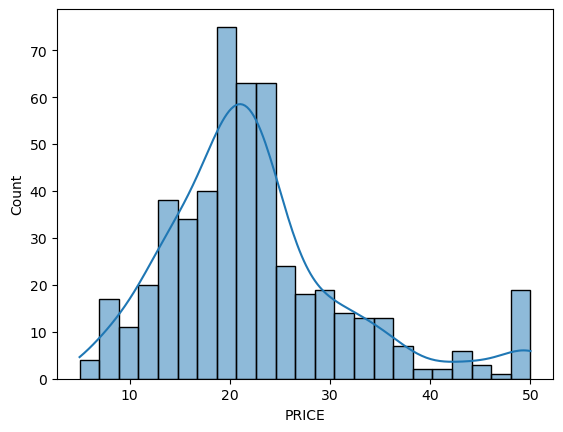

In [13]:
#checking the distribution of the target variable
import seaborn as sns
sns.histplot(df.PRICE , kde = True)

<Axes: ylabel='PRICE'>

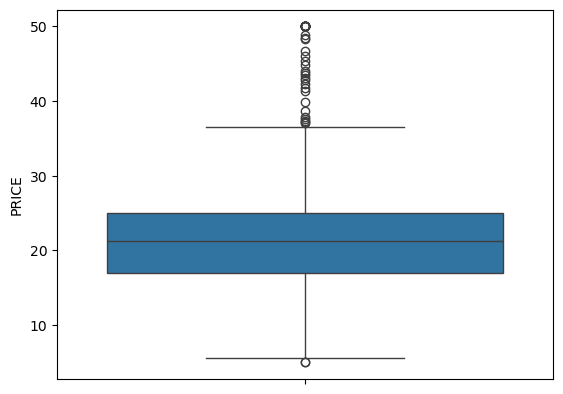

In [14]:
#Distribution using box plot
sns.boxplot(df.PRICE)

In [16]:
#checking Correlation of the data 
correlation = df.corr()
correlation.loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

<Axes: >

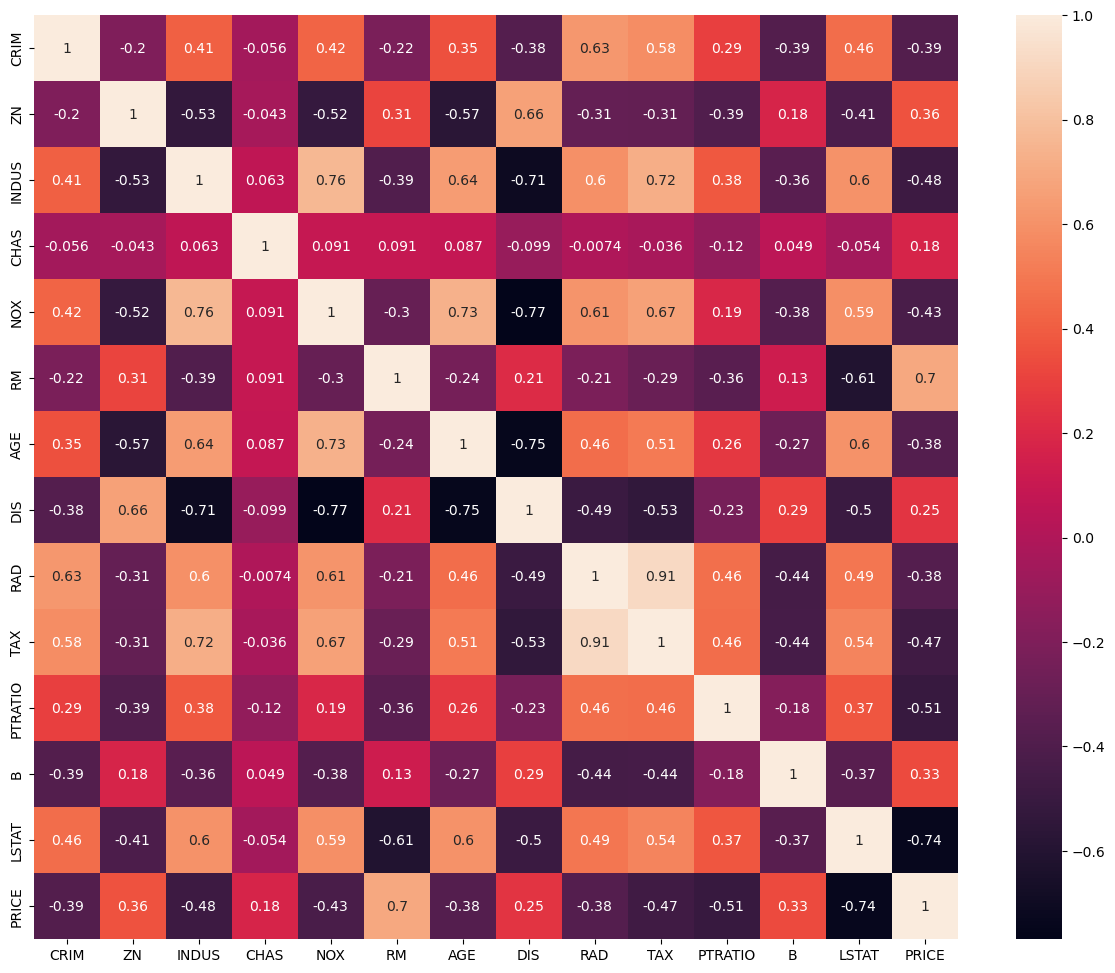

In [17]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

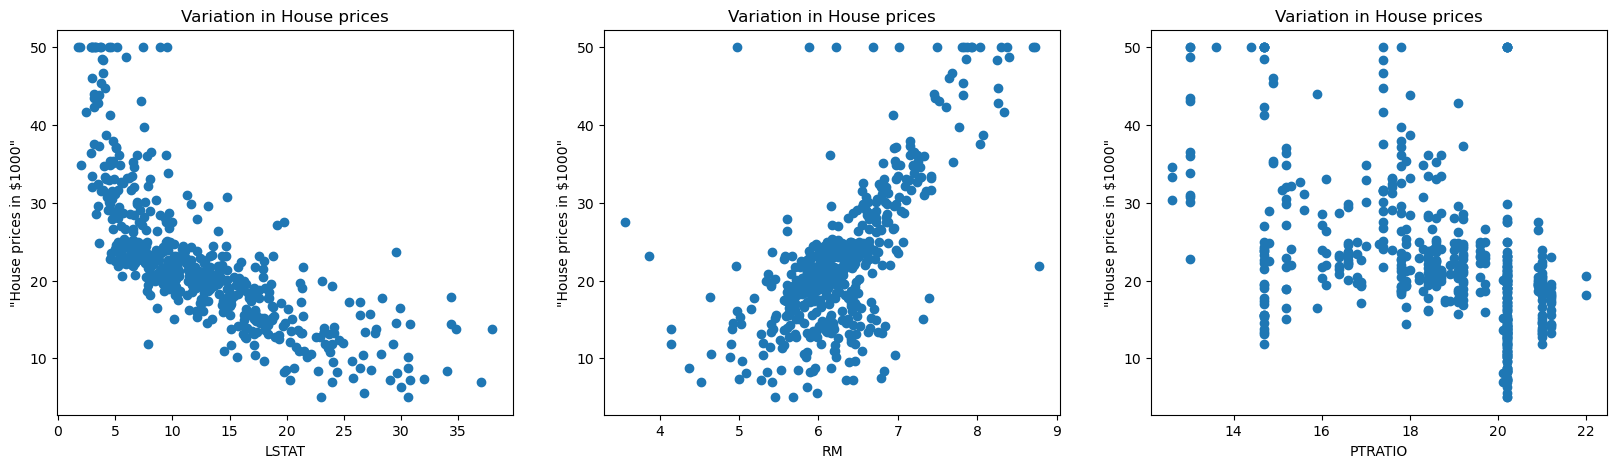

In [18]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]    #featurecolumn
    y = df.PRICE   #targetvariable
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

<a id = 'split'></a>
### Splitting the dependent feature and independent feature 

In [19]:
#X = data[['LSTAT','RM','PTRATIO']]
X = df.iloc[:,:-1]
y= df.PRICE

In [23]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)      # Ensures the split is reproducible (same every time)

<a id = 'build'></a>
### Building the Model 

In [24]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [25]:
#Fitting the model
regressor.fit(X_train,y_train)

LinearRegression()

<a id = 'evaluate'></a>
### Model Evaluation

In [26]:
#Prediction on the test dataset
y_pred = regressor.predict(X_test)

In [27]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

5.041784121402055


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)   #76.5% of the variance in house prices

0.7263451459702506


<a id  = 'NN'></a>
## Neural Networks

In [30]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))   #All use ReLU activation to introduce non-linearity.
model.add(Dense(1))                         # A single neuron with no activation     
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [33]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 596.5376
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 508.9558 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 366.5721 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 125.1438 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.8610 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.2392 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.4064
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.6533 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.2046 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.2318 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.7359
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9787 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.3122 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.2343
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [34]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


<a id = 'eval'></a>
### Evaluation of the model

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8925464424877371


In [36]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.159316003432252


In [37]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 1.3/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 1.3/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 1.8/150.0 MB 1.2 MB/s eta 0:02:00
   ---------------------------------------- 1.8/150.0 MB 1.2 MB/s eta 0:02:00
   ---------------------------------------- 1.8/150.0 MB 1.2 MB/s eta 0:02:00
    ----------------------

In [38]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Creating an XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

# Training the model
xgb_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R²: {r2_xgb}")


XGBoost RMSE: 3.7611171450245755
XGBoost R²: 0.8477110528202079


* We are using Keras for developing the neural network.
* Models in Keras are defined as a sequence of layers
* We create a Sequential model and add layers one at a time with activation function
* Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.The activation we are using is relu
* As this is a regression problem, the output layer has no activation function
* Elements of neural network has input layer, hidden layer and output layer
* input layer:- This layer accepts input features. It provides information from the outside world to the network, no computation is performed at this layer, nodes here just pass on the information(features) to the hidden layer.
* Hidden layer:-  Nodes of this layer are not exposed to the outer world, they are the part of the abstraction provided by any neural network. Hidden layer performs all sort of computation on the features entered through the input layer and transfer the result to the output layer.
* Output layer:- This layer bring up the information learned by the network to the outer world.
* Model Compilation:- The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase.
* Optimizer : - The optimizer we are using is adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
* Loss - mean square error

In [ ]:
sc.fit_transform(X_train) — Calculates mean and std on training data, and applies scaling.

sc.transform(X_test) — Uses the same scaling parameters to transform the test set

In [ ]:
plt.figure(figsize=(20, 5)):
Creates a figure with a size of 20 inches in width and 5 inches in height. This will allow the scatter plots to have enough space and not appear too compressed.

2. features = ['LSTAT', 'RM', 'PTRATIO']:
A list of features (LSTAT, RM, PTRATIO) is defined. These are the columns you’re interested in examining for correlation with PRICE.

3. for i, col in enumerate(features)::
This is a loop that will iterate through each feature in the features list. For each iteration:

i will hold the index (position) of the feature.

col will hold the name of the feature (LSTAT, RM, or PTRATIO).

4. plt.subplot(1, len(features), i+1):
Creates a subplot. The first argument (1) specifies that you want one row of subplots.

The second argument (len(features)) specifies how many subplots there will be in the row (equal to the number of features you have).

The third argument (i+1) sets the position of the subplot in the row. This ensures that each feature will have its own subplot.

5. x = df[col] and y = df.PRICE:
For each feature (col), it extracts the values from the DataFrame and assigns them to x (feature column) and y (target variable PRICE).

6. plt.scatter(x, y, marker='o'):
This draws the scatter plot with x on the x-axis and y on the y-axis. The marker='o' argument specifies that each point in the scatter plot should be represented by a circle (o).

7. plt.title("Variation in House prices"):
Sets the title of the scatter plot. This title will be the same for all the plots because it describes the general trend (variation in house prices).

8. plt.xlabel(col):
Sets the x-axis label to be the name of the feature (LSTAT, RM, or PTRATIO).

9. plt.ylabel('"House prices in $1000"'):
Sets the y-axis label to "House prices in $1000", indicating that the house prices are represented in thousands of dollars.

Result:
This will produce three scatter plots, each showing the relationship between one feature (LSTAT, RM, or PTRATIO) and the house prices (PRICE). For example:

The scatter plot for RM (average number of rooms per dwelling) will likely show a positive correlation with house prices (as more rooms often correlate with higher prices).

The scatter plot for LSTAT (percentage of lower-status population) may show a negative correlation with house prices, as higher LSTAT typically means lower house prices.

In [ ]:
regressor.predict(X_test) → predicts house prices based on test features

mean_squared_error() → calculates average squared error between actual and predicted values

np.sqrt() → takes square root to get RMSE, a common metric to measure prediction accuracy (lower = better)

In [ ]:
The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

The features can be summarized as follows:
* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 1000 bucks
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* PRICE: This is the median value of owner-occupied homes in 1000s